In [16]:
from scipy.integrate import quad, nquad

def f(x) : 
    return -1 * x

quad(func=f, a=0, b=1)

(-0.5, 5.551115123125783e-15)

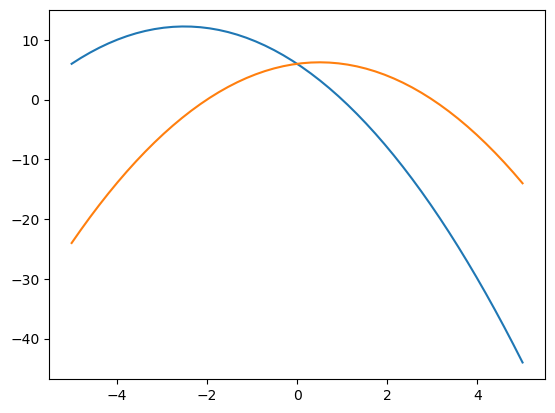

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def f(x) : 
    return -1 * x**2 -5 * x + 6

def g(x) : 
    return -1 * x**2 + x + 6

x = np.linspace(-5, 5)

plt.plot(x, f(x))
plt.plot(x, g(x))

In [18]:
(1.5 + 1.25) * 2 / 2

2.75

In [19]:
int(3 / 2)

1

In [20]:
for i in range(3) : 
    print(int(i * 10 / 3))

0
3
6


In [21]:
from numpy import pi
x = np.array([0, pi / 4, pi / 2, 3 * pi / 4, pi])
y = np.array([1, 0.3431, 0.2500, 0.3431, 1.000])

In [22]:
def trapezoidal(x_data, y_data, k) : 
    n = len(x_data) - 1
    if k > n : 
        print(f"Since input data has length of [{n + 1}], there can be [{n}] panels maximum.")
        return

    Area = 0
    
    for i in range(k) : 
        index = int(i * n / k)
        index_next = int((i + 1) * n / k)

        x1 = x_data[index]
        x2 = x_data[index_next]
        y1 = y_data[index]
        y2 = y_data[index_next]

        area = (y1 + y2) * (x2 - x1) / 2
        Area += area

    return Area



In [23]:
trapezoidal(x_data=x, y_data=y, k=4)

1.5206879239701394

In [24]:
from scipy.integrate import trapezoid

trapezoid(y, x)

1.5206879239701394

In [25]:
def simpson(x_data, y_data) : 
    n = len(x_data) - 1
    if n % 2 != 0 : 
        print(f"Simpson's 1/3 rules requires odd number of data : [{len(x_data)}]")
        return
    
    Area = 0
    for i in range(0, len(x_data) - 2, 2) : 
        h = x_data[i + 2] - x_data[i + 1]
        h += x_data[i + 1] - x_data[i]
        h /= 2
        
        Area += (y_data[i] + 4 * y_data[i + 1] + y_data[i + 2]) * h / 3
    
    return Area

In [26]:
simpson(x,y)

1.373085429128979

In [27]:
from scipy.integrate import simpson

simpson(y, x)

1.3730854291289787

In [28]:
def romberg(x_data, y_data) : 
    n = len(x_data) - 1
    R1_list = [trapezoidal(x_data=x_data, y_data=y_data, k=i) for i in range(1, n + 1)]
    R_array = np.zeros(shape=(n, n), dtype=float)
    R_array[:,0] = np.array(R1_list)
    
    for column in range(1, n) : 
        for row in range(column, n) : 
            R_array[row, column] = (4**(column) * R_array[row, column - 1] - R_array[row - 1, column - 1]) / (4**(column) - 1)
    
    return R_array

In [29]:
romberg(x,y)

array([[3.14159265, 0.        , 0.        , 0.        ],
       [1.96349541, 1.57079633, 0.        , 0.        ],
       [1.74209167, 1.66829042, 1.67479002, 0.        ],
       [1.52068792, 1.44688668, 1.43212643, 1.42827462]])

In [32]:
from scipy.integrate import romb

print(y)
romb(y, show=True)

[1.     0.3431 0.25   0.3431 1.    ]
Richardson Extrapolation Table for Romberg Integration
 4.00000 
 2.50000  2.00000 
 1.93620  1.74827  1.73148 


1.7314844444444444

In [31]:
x_data = np.array([])